In [128]:
import sqlalchemy as sqa
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
db = 'postgres://localhost/poker'
engine = sqa.create_engine(db)

In [130]:
df = pd.read_sql('v4vv6_2019_08_19_09:35', con=engine)
df.shape

(203416, 26)

In [131]:
for i in range(df.shape[0]):
    if df.at[i, 'player'] == 0.0 or df.at[i, 'player'] == 2.0 or df.at[i, 'player'] == 4.0:
        df.at[i, 'agent'] = 'Tom'
    else:
        df.at[i ,'agent'] = 'Paul'

In [132]:
#df.groupby(['game', 'player']).

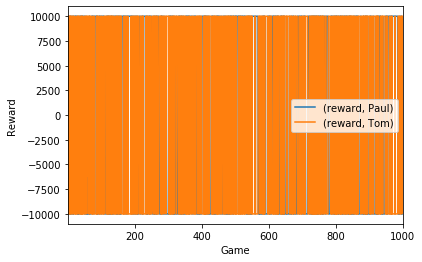

In [133]:
dfp = df[['player', 'game', 'reward', 'agent']].groupby(['player', 'game', 'agent'], as_index=False).mean()
dfp[['agent', 'game', 'reward']].groupby(['agent', 'game']).mean().unstack(0).plot()
#dfp.unstack(1).plot()
plt.xlabel('Game')
plt.ylabel('Reward')
plt.legend()
#plt.savefig('v0vv1.png')

In [134]:
df1 = df[df['agent']=='Tom']
#df1
df3 = df1[['player', 'game', 'reward', 'agent']].groupby(['player', 'agent', 'game']).mean().sum()#.describe()
df3.head()

reward   -397000.0
dtype: float64

In [135]:
df2 = df[df['agent']=='Paul']
df4 = df2[['player', 'game', 'reward', 'agent']].groupby(['player', 'agent', 'game']).mean()#.sum()#.describe()
df4.head()

reward
player agent game         
1.0    Paul  1.0  -10000.0
             2.0  -10000.0
             3.0  -10000.0
             4.0  -10000.0
             5.0  -10000.0

In [136]:
df1.shape, df2.shape, df3.shape, df4.shape

((101593, 26), (101823, 26), (1,), (3000, 1))

In [137]:
stat = stats.ttest_1samp(np.array(df4['reward']), 0)

In [138]:
stat.pvalue

0.7468245074102356

By agent:

In [12]:
df[['agent', 'reward', 'player', 'game']].groupby(['agent', 'player', 'game'], as_index=False).mean()[['agent', 'reward']].groupby(['agent']).mean()

,reward
agent,
1,-748.388173
2,743.338849


By player:

In [13]:
df[['reward', 'player', 'game']].groupby(['player', 'game'], as_index=False).mean()[['player', 'reward']].groupby(['player']).mean()

,reward
player,
0.0,-759.101405
1.0,2714.393771
2.0,-723.221710
3.0,-231.657892
4.0,-762.841404
5.0,-252.719333
